In [1]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt
import numpy as np
from ase import Atoms

from potentials import ParameterizedPotential

In [2]:
N = 101
L = 5

box = np.array((L,L,L/2))
atoms = Atoms('Ag', [box / 3], cell=box)
grid = (N,) * 3

lobato = ParameterizedPotential('lobato', atoms, grid)

_,_,z,_ = lobato.real_space_coordinates()

In [24]:
V_scattering = lobato.calc_from_scattering()
V_splines = lobato.calc_from_splines(r_min=.2,v_min=1e-4)

#V_scattering= np.flip(np.flip(np.flip(V_scattering,axis=0),axis=1),axis=2)

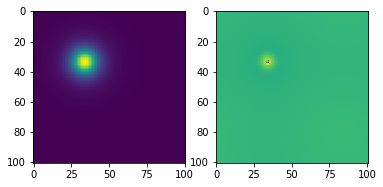

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(V_scattering[:,:,50])
ax2.imshow(V_splines[:,:,51]-V_scattering[:,:,51])

(0, 100000000000.0)

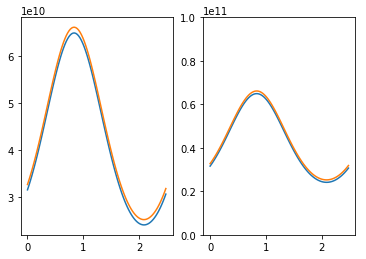

In [26]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z[N//2,N//2,:], V_splines[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
#ax1.set_ylim([0,2.5e4])
#ax1.set_xlim([L/2-1,L/2+1])

ax2.plot(z[N//2,N//2,:], V_splines[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
ax2.set_ylim([0,1e11])
#ax2.set_xlim([L/2+1,L/2+2])

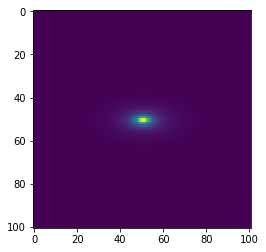

In [26]:
plt.imshow(V_scattering[50])